In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [38]:
df['Classes'] = df['Classes'].str.strip()

In [39]:

df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [40]:
df['Classes'] = df['Classes'].map({'not fire': 0, 'fire': 1})

In [42]:
df['Classes'].unique()

array([0, 1])

In [47]:
df = df.drop(columns=['day','month','year'])

<Axes: >

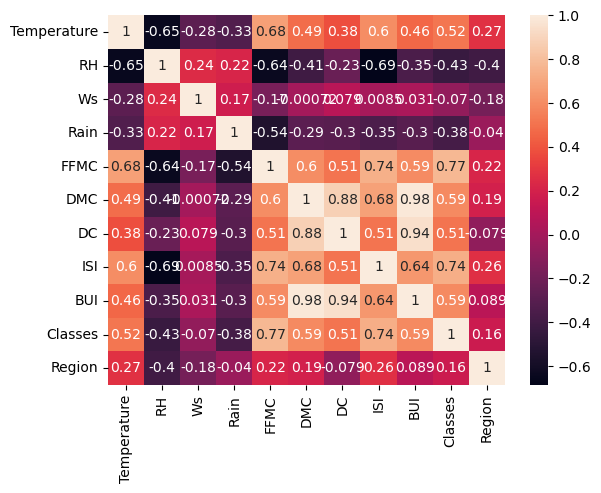

In [52]:
df.corr()
sns.heatmap(df.corr(),annot=True)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculate VIF
def calculate_vif(dataframe):
    X = add_constant(dataframe)  # statsmodels requires constant for VIF
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) 
                       for i in range(X.shape[1])]
    return vif_data

vif_results = calculate_vif(df.drop(columns=['DC','BUI']))
print(vif_results)

       Feature         VIF
0        const  444.165258
1  Temperature    2.302747
2           RH    3.192814
3           Ws    1.280275
4         Rain    1.539353
5         FFMC    4.919892
6          DMC    2.047805
7          ISI    4.583455
8      Classes    3.343855
9       Region    1.218503


In [ ]:
X = df.drop(columns=['BUI','DC']) ## highly correlated features removed

In [65]:
Y = df['Classes']

In [ ]:

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(X=X)


array([[-0.87065469, -0.34067323,  0.8932769 , ..., -0.83035573,
        -1.13686095, -0.99589321],
       [-0.87065469, -0.07035945, -0.88887652, ..., -0.90272026,
        -1.13686095, -0.99589321],
       [-1.69925426,  1.34878787,  2.31899963, ..., -1.07157084,
        -1.13686095, -0.99589321],
       ...,
       [-1.42305441,  1.68668009,  4.81401441, ..., -1.04744933,
        -1.13686095,  1.00412373],
       [-2.25165398, -0.54340856,  0.8932769 , ..., -0.73386968,
        -1.13686095,  1.00412373],
       [-2.25165398,  0.13237588, -0.17601515, ..., -0.85447724,
        -1.13686095,  1.00412373]])

In [66]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=40)

### when you can not remove entire features , but need to reduce error genereated bby including those features
## - regularization ( lasso / ridge)

#### lasso = lambda(sum(weights))
#### ridge = lambda(sum(weights**2))

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error , r2_score

ls = Lasso()
model = ls.fit(X_train , Y_train)
y_pred = model.predict(X_test)

print('mean absolute error is' , mean_absolute_error(Y_test , y_pred) , "\n r2 score is " , r2_score(Y_test , y_pred))

## Ridge

In [71]:
from sklearn.linear_model import Ridge

rd = Ridge()

model = rd.fit(X_train,Y_train)
y_pred2 = model.predict(X_test )

print('mean absolute error is' , mean_absolute_error(Y_test , y_pred2) , "\n r2 score is " , r2_score(Y_test , y_pred2))

mean absolute error is 0.0047399245428403495 
 r2 score is  0.9998627579969349


## Elastic net - combination of both

In [ ]:
from sklearn.linear_model import ElasticNet
el = ElasticNet()

model2  = el.fit(X_train,Y_train)
y_pred3 = model2.predict(X_test )

print('mean absolute error is' , mean_absolute_error(Y_test , y_pred3) , "\n r2 score is " , r2_score(Y_test , y_pred3))